# 4. Modes of Variability

<div style="text-align: right">
<p>
    <img src="https://pcmdi.github.io/assets/PCMDI/100px-PCMDI-Logo-NoText-square-png8.png"
         width="65"
         style="margin-right: 30px"
         title="Program for Climate Model Diagnosis and Intercomparison"
         alt="Program for Climate Model Diagnosis and Intercomparison"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/DOE/480px-DOE_Seal_Color.png"
         width="65"
         style="margin-right: 30px"
         title="United States Department of Energy"
         alt="United States Department of Energy"
    >&nbsp;
    <img src="https://pcmdi.github.io/assets/LLNL/212px-LLNLiconPMS286-WHITEBACKGROUND.png"
         width="65"
         style="margin-right: 30px"
         title="Lawrence Livermore National Laboratory"
         alt="Lawrence Livermore National Laboratory"
    >
</p>
</div>

**Summary**  

This notebook provides an overview of running the modes of variability module of PCMDI Metrics Package (PMP). 

**Authors**

Jiwoo Lee, Ana Ordonez (Lawrence Livermore National Laboratory)

**Reference**

- Lee, J., K. Sperber, P. Gleckler, C. Bonfils, and K. Taylor, 2019: Quantifying the Agreement Between Observed and Simulated Extratropical Modes of Interannual Variability. Climate Dynamics, 52, 4057-4089, https://doi.org/10.1007/s00382-018-4355-4

- Lee, J., K. Sperber, P. Gleckler, K. Taylor, and C. Bonfils, 2021: Benchmarking performance changes in the simulation of extratropical modes of variability across CMIP generations. Journal of Climate, 34, 6945–6969, https://doi.org/10.1175/JCLI-D-20-0832.1

---

**Table of Contents**

- [1. Environment](#env)

- [2. Usage](#usage)

- [3. Example](#example)

  * [3.1 **Atmospheric mode: NAM**](#NAM)

    - 3.1.1 Run metrics

    - 3.1.2 Customize Observation Settings

    - 3.1.3 Customize Model Settings

    - 3.1.4 Customize Analysis Settings

    - 3.1.5 Results

  * [3.2 **SST-based mode: PDO**](#PDO)

    - 3.2.1 Run Metircs

    - 3.2.2 Results

  * [3.3 **SST-based mode: AMO**](#AMO)

    - 3.3.1 Run Metircs

    - 3.3.2 Results

---

**NOTE**

* The installation instruction for the PMP can be found [here](http://pcmdi.github.io/pcmdi_metrics/install.html).

* More information can be found in the [README](https://github.com/PCMDI/pcmdi_metrics/tree/master/pcmdi_metrics/variability_mode). Additional example parameter files are archived in the [PMP sample setups](https://github.com/PCMDI/pcmdi_metrics/tree/master/sample_setups/pcmdi_parameter_files/variability_modes). 

* It is expected that the user has run the [Demo_0_download_data notebook](Demo_0_download_data.ipynb) to obtain the sample data and generate parameter files. This first cell loads the demo directory choices made in Demo_0_download_data.

In [1]:
from user_choices import demo_data_directory, demo_output_directory

In [2]:
# To open and display one of the graphics
from IPython.display import display_png, JSON, Image

In [3]:
# For quick output check in this notebook
import xcdat as xc
import xarray as xr
import datetime
import matplotlib.pyplot as plt

## 1. Environment <a class="anchor" id="env"></a>

The modes of variability metric requires following two packages installed in your environment: [eofs](https://ajdawson.github.io/eofs/latest/) and [scipy](https://www.scipy.org/). They are part of the standard PMP installation, so should have been installed when you were installing the PMP. However in case somehow if they were not installed in your environment, you can edit the following cell to install them in your environment from this jupyter notebook kernel. Delete the triple quotations from lines 2&5 to install with conda:

In [4]:
# for conda
"""
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge eofs scipy
"""

'\nimport sys\n!conda install --yes --prefix {sys.prefix} -c conda-forge eofs scipy\n'

OR delete the triple quotations on lines 2&5 from this cell to install with pip:

In [5]:
# for pip
"""
import sys
!{sys.executable} -m pip install eofs scipy
"""

'\nimport sys\n!{sys.executable} -m pip install eofs scipy\n'

## 2. Usage <a class="anchor" id="usage"></a>

Modes of variability can be run on the command line or with using a parameter file

Available modes: NAM, NAO, SAM, PNA, PDO, NPO, NPGO, AMO  
Available seasons: DJF, MAM, JJA, SON, monthly, yearly  
ConvEOF = True  # Calculate conventioanl EOF for model  
CBF = True  # Calculate Common Basis Function (CBF) for model  

For help, type:  
```
variability_modes_driver.py --help
```

In [6]:
%%bash
variability_modes_driver.py --help

usage: variability_modes_driver.py [-h] [--parameters PARAMETERS]
                                   [--diags OTHER_PARAMETERS [OTHER_PARAMETERS ...]]
                                   [--results_dir RESULTS_DIR]
                                   [--reference_data_path REFERENCE_DATA_PATH]
                                   [--modpath MODPATH] [--mip MIP] [--exp EXP]
                                   [--frequency FREQUENCY] [--realm REALM]
                                   [--reference_data_name REFERENCE_DATA_NAME]
                                   [-v VARIABILITY_MODE]
                                   [--seasons SEASONS [SEASONS ...]]
                                   [--modnames MODNAMES [MODNAMES ...]]
                                   [-r REALIZATION] [--modpath_lf MODPATH_LF]
                                   [--varOBS VAROBS] [--varModel VARMODEL]
                                   [--eofn_obs EOFN_OBS] [--eofn_mod EOFN_MOD]
                                   [--osyear

## 3. Example <a class="anchor" id="example"></a>

### 3.1 Atmospheric mode: NAM <a class="anchor" id="NAM"></a>

#### 3.1.1 Run metrics

This example uses settings from the "basic_mov_param.py" parameter file to run the metrics for the NAM (Northern Annular Mode) in DJF. The input data for this mode of variability is monthly sea level pressure. 

The below process could take about 4 minutes.

In [7]:
%%bash
variability_modes_driver.py -p basic_mov_param.py --case_id "mov_1"

mip: cmip5
exp: historical
fq: mo
realm: atm
EofScaling: False
RmDomainMean: True
LandMask: False
nc_out_obs, plot_obs: True True
nc_out_model, plot_model: True True
CMEC:False
mode: NAM
seasons: ['DJF']
models: ['ACCESS1-0']
number of models: 1
realization:  r1i1p1
eofn_obs: 1
eofn_mod: 1
parallel: False
output directories:
graphics : demo_output_tmp/mov_1
diagnostic_results : demo_output_tmp/mov_1
metrics_results : demo_output_tmp/mov_1
Converting units by  divide 100.0
 -----  ACCESS1-0  ---------------------
runs: ['r1i1p1']
run: ['r1i1p1']
 ---  r1i1p1  ---
model_run_path: ['demo_data_tmp/CMIP5_demo_data/psl_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc']
model_lf_path: None
Converting units by  divide 100.0


INFO::2024-12-23 10:04::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mov_1/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json
2024-12-23 10:04:43,349 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mov_1/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json
2024-12-23 10:04:43,349 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mov_1/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json


#### 3.1.2 Customize Observation Settings

Options given in the `basic_mov_param.py` file can be overriden by options given from the command line.

For example, below is for settings for observations from `basic_mov_param.py`:
```python
varOBS = 'psl'  
ObsUnitsAdjust = (True, 'divide', 100.0)  # Pa to hPa; or (False, 0, 0)  

osyear = 1900  
oeyear = 2005  
eofn_obs = 1  
```

If you want to adjust observation starting year (`osyear`) to 1980 and assign new `case_id` as "mov_2":

The below process could take about 4 minutes.

In [8]:
%%bash
variability_modes_driver.py -p basic_mov_param.py --case_id "mov_2" --osyear 1980

mip: cmip5
exp: historical
fq: mo
realm: atm
EofScaling: False
RmDomainMean: True
LandMask: False
nc_out_obs, plot_obs: True True
nc_out_model, plot_model: True True
CMEC:False
mode: NAM
seasons: ['DJF']
models: ['ACCESS1-0']
number of models: 1
realization:  r1i1p1
eofn_obs: 1
eofn_mod: 1
parallel: False
output directories:
graphics : demo_output_tmp/mov_2
diagnostic_results : demo_output_tmp/mov_2
metrics_results : demo_output_tmp/mov_2
Converting units by  divide 100.0
 -----  ACCESS1-0  ---------------------
runs: ['r1i1p1']
run: ['r1i1p1']
 ---  r1i1p1  ---
model_run_path: ['demo_data_tmp/CMIP5_demo_data/psl_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc']
model_lf_path: None
Converting units by  divide 100.0


INFO::2024-12-23 10:08::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mov_2/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json
2024-12-23 10:08:05,400 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mov_2/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json
2024-12-23 10:08:05,400 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mov_2/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json


#### 3.1.3 Customize Model Settings

Similarly, options for models can be also adjusted from command line.

The below process could take about 4 minutes.

In [9]:
%%bash
variability_modes_driver.py -p basic_mov_param.py --case_id "mov_3" --msyear 1950 --meyear 2005

mip: cmip5
exp: historical
fq: mo
realm: atm
EofScaling: False
RmDomainMean: True
LandMask: False
nc_out_obs, plot_obs: True True
nc_out_model, plot_model: True True
CMEC:False
mode: NAM
seasons: ['DJF']
models: ['ACCESS1-0']
number of models: 1
realization:  r1i1p1
eofn_obs: 1
eofn_mod: 1
parallel: False
output directories:
graphics : demo_output_tmp/mov_3
diagnostic_results : demo_output_tmp/mov_3
metrics_results : demo_output_tmp/mov_3
Converting units by  divide 100.0
 -----  ACCESS1-0  ---------------------
runs: ['r1i1p1']
run: ['r1i1p1']
 ---  r1i1p1  ---
model_run_path: ['demo_data_tmp/CMIP5_demo_data/psl_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc']
model_lf_path: None
Converting units by  divide 100.0


INFO::2024-12-23 10:10::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mov_3/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1950-2005.json
2024-12-23 10:10:20,992 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mov_3/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1950-2005.json
2024-12-23 10:10:20,992 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mov_3/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1950-2005.json


#### 3.1.4 Customize Analysis Settings

Similarly, options for analysis can be also adjusted from command line. Below example applies a custom season (Jan-Feb-Mar)

The below process could take about 4 minutes.

In [10]:
%%bash
variability_modes_driver.py -p basic_mov_param.py --case_id "mov_4" --seasons "JFM"

mip: cmip5
exp: historical
fq: mo
realm: atm
EofScaling: False
RmDomainMean: True
LandMask: False
nc_out_obs, plot_obs: True True
nc_out_model, plot_model: True True
CMEC:False
mode: NAM
seasons: ['JFM']
models: ['ACCESS1-0']
number of models: 1
realization:  r1i1p1
eofn_obs: 1
eofn_mod: 1
parallel: False
output directories:
graphics : demo_output_tmp/mov_4
diagnostic_results : demo_output_tmp/mov_4
metrics_results : demo_output_tmp/mov_4
Converting units by  divide 100.0
 -----  ACCESS1-0  ---------------------
runs: ['r1i1p1']
run: ['r1i1p1']
 ---  r1i1p1  ---
model_run_path: ['demo_data_tmp/CMIP5_demo_data/psl_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc']
model_lf_path: None
Converting units by  divide 100.0


INFO::2024-12-23 10:13::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mov_4/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json
2024-12-23 10:13:01,199 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mov_4/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json
2024-12-23 10:13:01,199 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/mov_4/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json


#### 3.1.5 Results

Results are generated in three different types: maps in image (PNG), maps and time series in binary (netCDF), and metrics in text (JSON).

By the default setting, metrics code generates outputs for CBF (Common Basis Function), EOF1, EOF2, and EOF3. 

##### Graphic images (PNG)

Graphics are saved in along with other results in a folder with the case_id name. Here we list the images available from the Basic Example and display the CBF plot.

In [11]:
!ls {demo_output_directory + "/mov_1/*.png"}

demo_output_tmp/mov_1/EG_Spec_North_test_NAM_DJF_NOAA-20CR_1900-2005.png
demo_output_tmp/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.png
demo_output_tmp/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.png
demo_output_tmp/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf_compare_obs.png
demo_output_tmp/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf_teleconnection.png
demo_output_tmp/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_eof1_compare_obs.png
demo_output_tmp/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_teleconnection.png
demo_output_tmp/mov_1/NAM_psl_EOF1_DJF_obs_1900-2005.png
demo_output_tmp/mov_1/NAM_psl_EOF1_DJF_obs_1900-2005_teleconnection.png
demo_output_tmp/mov_1/NAM_psl_EOF2_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.png
demo_output_tmp/mov_1/NAM_psl_EOF2_DJF_cmip5_ACCESS1-0_historical_r1i

In [12]:
image_path = demo_output_directory + "/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf_compare_obs.png"

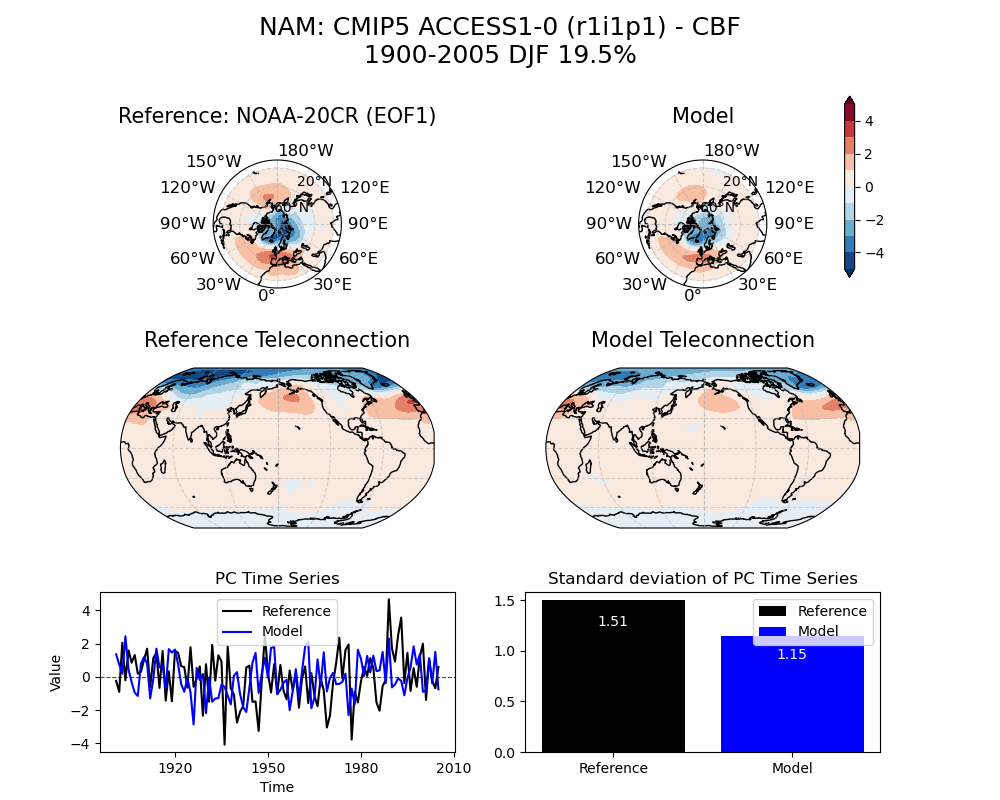

In [13]:
img = Image(image_path)
display_png(img)

**Above figure:** Simulated NAM obtained from the reference dataset (NOAA-20CR) [top] and ACCESS1-0 model using the Common Basis Function (CBF) approach [bottom]. Percent of variance (%) explained by the simulated mode is noted at the top.

#####  Binary (NetCDF)

NetCDF files include spatial patterns for aforementioned maps and associated PC timeseries. The ncdump utility is used to get a summary of the netCDF results from the Basic Example.

In [14]:
!ls {demo_output_directory + "/mov_1/*.nc"}

demo_output_tmp/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.nc
demo_output_tmp/mov_1/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.nc
demo_output_tmp/mov_1/NAM_psl_EOF1_DJF_obs_1900-2005.nc
demo_output_tmp/mov_1/NAM_psl_EOF2_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.nc
demo_output_tmp/mov_1/NAM_psl_EOF3_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.nc


In [15]:
!ncdump -h {demo_output_directory + "/mov_1_xcdat_test/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.nc"}

ncdump: demo_output_tmp/mov_1_xcdat_test/NAM_psl_EOF1_DJF_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.nc: No such file or directory


##### Metrics (JSON)

Finally, we list the JSON metrics files from the Basic Example and look inside one of these JSONS.

In [16]:
!ls {demo_output_directory + "/mov_1/*.json"}

demo_output_tmp/mov_1/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json


In [17]:
import json
with open(demo_output_directory+"/mov_1/var_mode_NAM_EOF1_stat_cmip5_historical_mo_atm_ACCESS1-0_r1i1p1_1900-2005.json") as fj:
    metrics = json.load(fj)["RESULTS"]
print(json.dumps(metrics, indent=2))

{
  "ACCESS1-0": {
    "r1i1p1": {
      "defaultReference": {
        "NAM": {
          "DJF": {
            "best_matching_model_eofs__cor": 1,
            "best_matching_model_eofs__rms": 1,
            "best_matching_model_eofs__tcor_cbf_vs_eof_pc": 1,
            "cbf": {
              "bias": 0.0019044283051581606,
              "bias_glo": -0.03891111140254223,
              "cor": 0.9709328333397009,
              "cor_glo": 0.9570976144478974,
              "frac": 0.19508778654899483,
              "frac_cbf_regrid": 0.17504452464668094,
              "mean": -3.2489357499401115e-16,
              "mean_glo": 0.07401741600464784,
              "rms": 0.46008286670697096,
              "rms_glo": 0.2977712440328747,
              "rmsc": 0.24111058858498566,
              "rmsc_glo": 0.2929245863866285,
              "stdv_pc": 1.1509405078691017,
              "stdv_pc_ratio_to_obs": 0.7606443647721698
            },
            "eof1": {
              "bias": 0.001548872525

### 3.2 SST-based mode: PDO <a class="anchor" id="PDO"></a>
#### 3.2.1 Run Metircs

The below process could take about 6 minutes.

In [18]:
%%bash
variability_modes_driver.py -p basic_mov_param_sst.py --case_id "PDO" --msyear 1900 --meyear 2005

mip: cmip5
exp: historical
fq: mo
realm: atm
EofScaling: False
RmDomainMean: True
LandMask: True
nc_out_obs, plot_obs: True True
nc_out_model, plot_model: True True
CMEC:False
mode: PDO
seasons: ['monthly']
models: ['ACCESS1-0']
number of models: 1
realization:  r1i1p1
eofn_obs: 1
eofn_mod: 1
parallel: False
output directories:
graphics : demo_output_tmp/PDO
diagnostic_results : demo_output_tmp/PDO
metrics_results : demo_output_tmp/PDO
Converting units by  subtract 273.15


/Users/lee1043/mambaforge/envs/pmp_devel_20241202/lib/python3.10/site-packages/pcmdi_metrics/utils/land_sea_mask.py:211: UserWarning: landfrac is not provided thus generated using the 'create_land_sea_mask' function
  warnings.warn(


 -----  ACCESS1-0  ---------------------
runs: ['r1i1p1']
run: ['r1i1p1']
 ---  r1i1p1  ---
model_run_path: ['demo_data_tmp/CMIP5_demo_data/ts_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc']
model_lf_path: demo_data_tmp/CMIP5_demo_data/sftlf_fx_ACCESS1-0_amip_r0i0p0.nc
Converting units by  subtract 273.15


2024-12-23 10:13:33,268 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2024-12-23 10:13:33,268 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
/Users/lee1043/mambaforge/envs/pmp_devel_20241202/lib/python3.10/site-packages/dask/_task_spec.py:651: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/Users/lee1043/m

In [19]:
%%bash
variability_modes_driver.py -p basic_mov_param_sst.py --case_id "PDO_test" --osyear 1900 --oeyear 1905 --msyear 1900 --meyear 1905

mip: cmip5
exp: historical
fq: mo
realm: atm
EofScaling: False
RmDomainMean: True
LandMask: True
nc_out_obs, plot_obs: True True
nc_out_model, plot_model: True True
CMEC:False
mode: PDO
seasons: ['monthly']
models: ['ACCESS1-0']
number of models: 1
realization:  r1i1p1
eofn_obs: 1
eofn_mod: 1
parallel: False
output directories:
graphics : demo_output_tmp/PDO_test
diagnostic_results : demo_output_tmp/PDO_test
metrics_results : demo_output_tmp/PDO_test
Converting units by  subtract 273.15


/Users/lee1043/mambaforge/envs/pmp_devel_20241202/lib/python3.10/site-packages/pcmdi_metrics/utils/land_sea_mask.py:211: UserWarning: landfrac is not provided thus generated using the 'create_land_sea_mask' function
  warnings.warn(


 -----  ACCESS1-0  ---------------------
runs: ['r1i1p1']
run: ['r1i1p1']
 ---  r1i1p1  ---
model_run_path: ['demo_data_tmp/CMIP5_demo_data/ts_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc']
model_lf_path: demo_data_tmp/CMIP5_demo_data/sftlf_fx_ACCESS1-0_amip_r0i0p0.nc
Converting units by  subtract 273.15


2024-12-23 10:17:24,323 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2024-12-23 10:17:24,323 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
/Users/lee1043/mambaforge/envs/pmp_devel_20241202/lib/python3.10/site-packages/dask/_task_spec.py:651: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/Users/lee1043/m

#### 3.2.2 Results

In [20]:
image_path = demo_output_directory + "/PDO/PDO_ts_EOF1_monthly_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf_compare_obs.png"

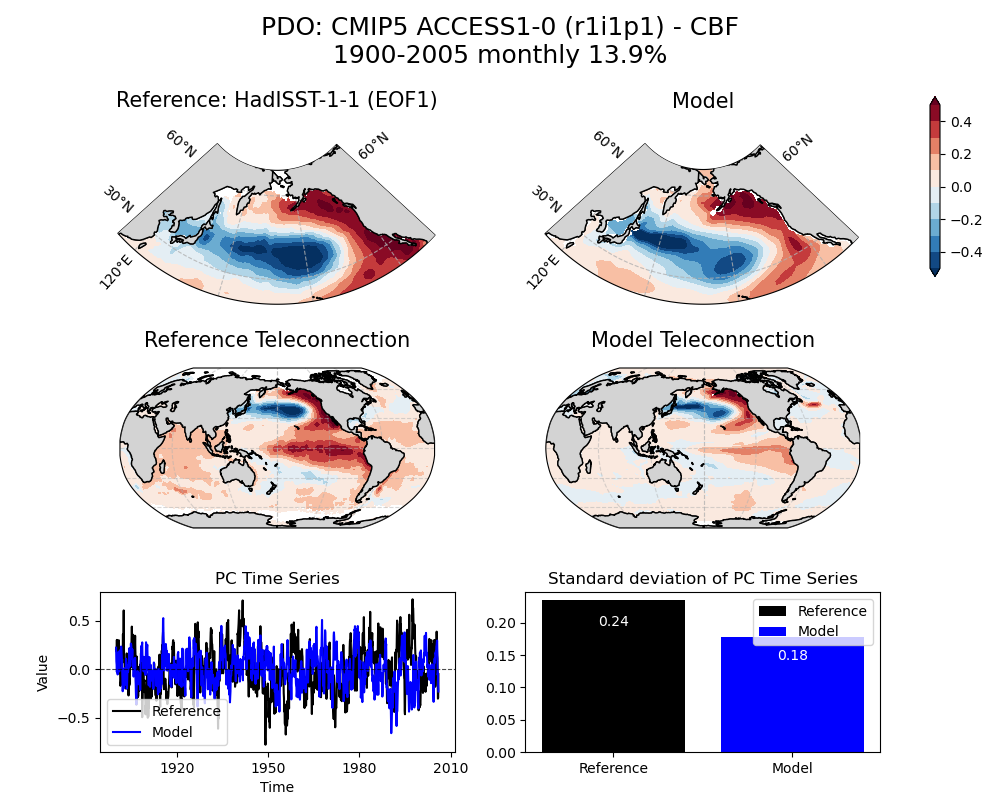

In [21]:
img = Image(image_path)
display_png(img)

**Above figure:** PDO pattern obtained from the reference dataset (HadISST-1-1) [top], ACCESS1-0 model using the CBF [middle] and traditional EOF approach [bottom]. Percent of variance (%) explained by the simulated mode is noted at the top.

##### Quick analysis: Comparison between CBF and traditional EOF approaches

In [22]:
ncfilename = demo_output_directory + "/PDO/PDO_ts_EOF1_monthly_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.nc"

In [23]:
ncfilename2 = demo_output_directory + "/PDO/PDO_ts_EOF1_monthly_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005.nc"

In [24]:
ds1 = xc.open_dataset(ncfilename)
ds2 = xc.open_dataset(ncfilename2)

In [25]:
ds1

<xarray.Dataset> Size: 697kB
Dimensions:    (time: 1272, lat: 145, lon: 192, bnds: 2)
Coordinates:
    mode       int64 8B 0
  * lat        (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon        (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
  * time       (time) object 10kB 1900-01-16 12:00:00 ... 2005-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    pc         (time) float64 10kB ...
    eof        (lat, lon) float64 223kB ...
    slope      (lat, lon) float64 223kB ...
    intercept  (lat, lon) float64 223kB ...
    frac       float64 8B ...
    lon_bnds   (lon, bnds) float64 3kB -0.9375 0.9375 0.9375 ... 357.2 359.1
    lat_bnds   (lat, bnds) float64 2kB -90.0 -89.38 -89.38 ... 89.38 89.38 90.0
Attributes:
    title:          PCMDI Metrics Package Extratropical Modes of Variability ...
    author:         PCMDI
    contact:        pcmdi-metrics@llnl.gov
    creation_date:  2024-12-23 18:14:19
    references:     \n    Lee, J., K. Sperber, P. Gleckler, C. Bonfils, and K...
    identifier:     CMIP5 ACCESS1-0 (r1i1p1), CBF

In [26]:
date = [datetime.datetime(d.year, d.month, d.day) for d in ds1.time.values]

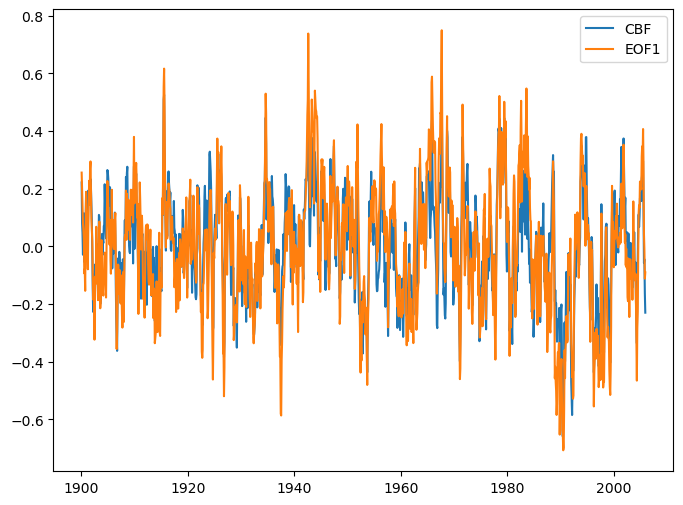

In [27]:
fig = plt.figure(figsize=(8, 6))

plt.plot(date, ds1['pc'], label='CBF')
plt.plot(date, ds2['pc'], label='EOF1')
plt.legend()

##### Temporal correlation between the two time series

In [28]:
float(xr.corr(ds1['pc'], ds2['pc']))

0.8727176457092453

##### Quick check for the binary output

###### Output fields from Reference data and model

In [29]:
ds_obs = xc.open_dataset(demo_output_directory + "/PDO/PDO_ts_EOF1_monthly_obs_1900-2005.nc")
ds_model = xc.open_dataset(demo_output_directory + "/PDO/PDO_ts_EOF1_monthly_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf.nc")

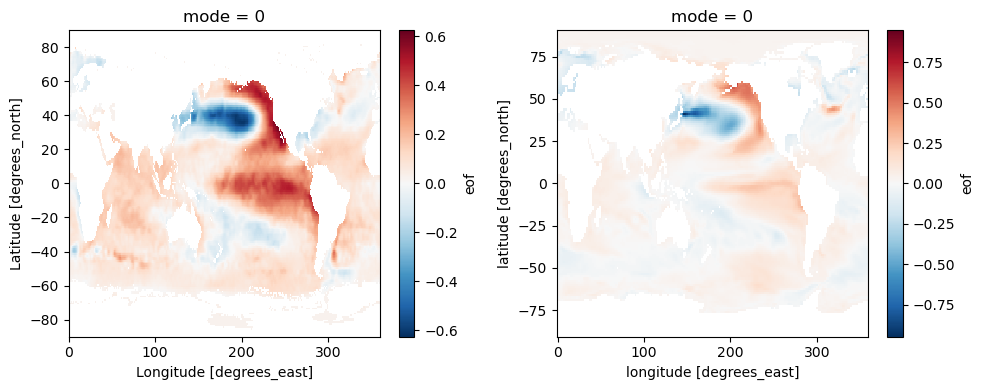

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ds_obs['eof'].plot(ax=ax1)
ds_model['eof'].plot(ax=ax2)

fig.tight_layout()

### 3.3 SST-based mode: AMO <a class="anchor" id="AMO"></a>
#### 3.3.1 Run Metrics


- Above default AMO calculation was done for monthly interval. To get smoothed result, below is repeating the AMO calculation but with yearly averaged.

The below process could take about 7 minutes.

In [31]:
%%bash
variability_modes_driver.py -p basic_mov_param_sst.py --variability_mode "AMO" --case_id "AMO" --msyear 1900 --meyear 2005 --seasons yearly

mip: cmip5
exp: historical
fq: mo
realm: atm
EofScaling: False
RmDomainMean: True
LandMask: True
nc_out_obs, plot_obs: True True
nc_out_model, plot_model: True True
CMEC:False
mode: AMO
seasons: ['yearly']
models: ['ACCESS1-0']
number of models: 1
realization:  r1i1p1
eofn_obs: 1
eofn_mod: 1
parallel: False
output directories:
graphics : demo_output_tmp/AMO
diagnostic_results : demo_output_tmp/AMO
metrics_results : demo_output_tmp/AMO
Converting units by  subtract 273.15


/Users/lee1043/mambaforge/envs/pmp_devel_20241202/lib/python3.10/site-packages/pcmdi_metrics/utils/land_sea_mask.py:211: UserWarning: landfrac is not provided thus generated using the 'create_land_sea_mask' function
  warnings.warn(


 -----  ACCESS1-0  ---------------------
runs: ['r1i1p1']
run: ['r1i1p1']
 ---  r1i1p1  ---
model_run_path: ['demo_data_tmp/CMIP5_demo_data/ts_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc']
model_lf_path: demo_data_tmp/CMIP5_demo_data/sftlf_fx_ACCESS1-0_amip_r0i0p0.nc
Converting units by  subtract 273.15


2024-12-23 10:18:49,406 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2024-12-23 10:18:49,406 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
/Users/lee1043/mambaforge/envs/pmp_devel_20241202/lib/python3.10/site-packages/dask/_task_spec.py:651: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/Users/lee1043/m

In [32]:
%%bash
variability_modes_driver.py -p basic_mov_param_sst.py --variability_mode "AMO" --case_id "AMO_test" --seasons yearly --osyear 1900 --oeyear 1905 --msyear 1900 --meyear 1905

mip: cmip5
exp: historical
fq: mo
realm: atm
EofScaling: False
RmDomainMean: True
LandMask: True
nc_out_obs, plot_obs: True True
nc_out_model, plot_model: True True
CMEC:False
mode: AMO
seasons: ['yearly']
models: ['ACCESS1-0']
number of models: 1
realization:  r1i1p1
eofn_obs: 1
eofn_mod: 1
parallel: False
output directories:
graphics : demo_output_tmp/AMO_test
diagnostic_results : demo_output_tmp/AMO_test
metrics_results : demo_output_tmp/AMO_test
Converting units by  subtract 273.15


/Users/lee1043/mambaforge/envs/pmp_devel_20241202/lib/python3.10/site-packages/pcmdi_metrics/utils/land_sea_mask.py:211: UserWarning: landfrac is not provided thus generated using the 'create_land_sea_mask' function
  warnings.warn(


 -----  ACCESS1-0  ---------------------
runs: ['r1i1p1']
run: ['r1i1p1']
 ---  r1i1p1  ---
model_run_path: ['demo_data_tmp/CMIP5_demo_data/ts_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc']
model_lf_path: demo_data_tmp/CMIP5_demo_data/sftlf_fx_ACCESS1-0_amip_r0i0p0.nc
Converting units by  subtract 273.15


2024-12-23 10:22:22,233 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2024-12-23 10:22:22,233 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
/Users/lee1043/mambaforge/envs/pmp_devel_20241202/lib/python3.10/site-packages/dask/_task_spec.py:651: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/Users/lee1043/m

#### 3.3.2 Results

In [33]:
image_path = demo_output_directory + "/AMO/AMO_ts_EOF1_yearly_cmip5_ACCESS1-0_historical_r1i1p1_mo_atm_1900-2005_cbf_compare_obs.png"

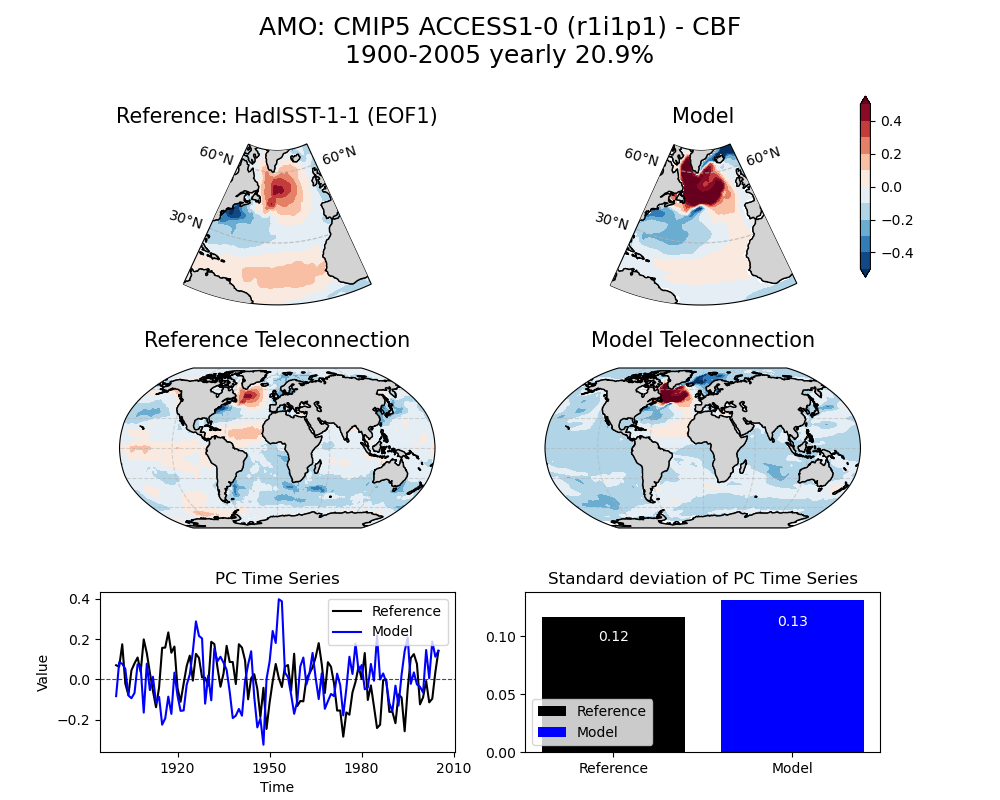

In [34]:
img = Image(image_path)
display_png(img)